# DATA 240-21, Fall 2024
# Assignment #3 (Release on Nov 2nd, 2024, Due 11:59pm on Nov 19th, 2024)

### Notes
- This assignment should be submitted in Canvas as a format of ipython notebook (assignment3.ipynb).
- No late assignments will be accepted. Do not accept any other format. Minimum penalty is 2pts with acceptable excuse.
- You may collaborate on homework but must independently write code/solutions. Copying and other forms of cheating will not be tolerated and will result in a zero score for the homework (minimal penalty) or a failing grade for the course.
- Your work will be graded in terms of correctness, completeness, and clarity, not just the answer. Thus, correct answers with no or poorly written supporting steps may receive very little credit.

### NOTE: Please do not use any open-source algorithm for gradient decent method. Instead, you need to write gradient descent method from scratch.

In [1]:
import pandas as pd
import seaborn as sns

# 1. (5 pts) Linear regression with gradient decent

Please download housing.csv. This is a real-life dataset consisting of housing sales prices in the city of Windsor, Ontario, Canada. You can find a description of the variables in housing.txt. Our target variable is ‘price’.

- Linear regression using gradient descent method from scratch 
- This is the task of Linear regression with multi variables.

- You need to find the optimum Weights using gradient decent method from scratch.
- Before applying gradient descent method, you might need to normalize variables, which is called feature scaling or normalization.
- In gradient descent algorithm, weight needs to be updated every iteration.



In [2]:
df = pd.read_csv("data/housing.csv")
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500,4000,2,1,1,yes,no,no,no,no,0,no
2,49500,3060,3,1,1,yes,no,no,no,no,0,no
3,60500,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Converting the column from object to int = {column =}")
        df[column] = df[column].replace({'yes': 1, 'no': 0})

df.describe()

Converting the column from object to int = column ='driveway'
Converting the column from object to int = column ='recroom'
Converting the column from object to int = column ='fullbase'
Converting the column from object to int = column ='gashw'
Converting the column from object to int = column ='airco'
Converting the column from object to int = column ='prefarea'


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [4]:
import numpy as np

X_home, y_home = df[df.columns[1:]], df[df.columns[0]]
print(f"{X_home.shape = }, {y_home.shape = }")

X_home_mean = X_home.mean()
X_home_std = X_home.std()

X_home = (X_home - np.mean(X_home, axis=0)) / np.std(X_home, axis=0)

print(f"Training set size: {X_home.shape}")
X_home

X_home.shape = (546, 11), y_home.shape = (546,)
Training set size: (546, 11)


,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,0.323028,0.047235,-0.569495,0.221704,0.40519,-0.464796,1.363319,-0.219054,-0.681034,0.357567,-0.553372
1,-0.531013,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
2,-0.964958,0.047235,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
3,0.692343,0.047235,-0.569495,0.221704,0.40519,2.151480,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
4,0.558466,-1.310147,-0.569495,-0.931157,0.40519,-0.464796,-0.733504,-0.219054,-0.681034,-0.804525,-0.553372
...,...,...,...,...,...,...,...,...,...,...,...
541,-0.161698,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
542,0.392275,0.047235,1.423737,2.527427,0.40519,-0.464796,-0.733504,-0.219054,1.468356,-0.804525,-0.553372
543,0.392275,0.047235,1.423737,2.527427,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372
544,0.392275,0.047235,1.423737,0.221704,0.40519,2.151480,-0.733504,-0.219054,1.468356,0.357567,-0.553372


## abstractmethod1-1. (3pts) Please build a gradient descent algorithm based on the following formulas.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2. The y and 𝑦̂  should be original scale instead of normalized scale.

Linear Regression Model Initialized with alpha=0.01, epochs=500
Start time for the gradient descent: 2024-11-19 22:53:11.287838
	 Epoch    1 /  500, Cost: 5352278701.3077
	 Epoch    2 /  500, Cost: 5126157738.2656
	 Epoch    3 /  500, Cost: 4911152726.2470
	 Epoch    4 /  500, Cost: 4706624985.9294
	 Epoch    5 /  500, Cost: 4511979327.3632
	 Epoch    6 /  500, Cost: 4326660660.0101
	 Epoch    7 /  500, Cost: 4150150889.8620
	 Epoch    8 /  500, Cost: 3981966078.2649
	 Epoch    9 /  500, Cost: 3821653839.3633
	 Epoch   10 /  500, Cost: 3668790955.1580
	 Epoch   11 /  500, Cost: 3522981189.0617
	 Epoch  101 /  500, Cost:  316131917.8791
	 Epoch  201 /  500, Cost:  234287445.6632
	 Epoch  301 /  500, Cost:  232701242.0317
	 Epoch  401 /  500, Cost:  232651962.9214
	 Epoch  500 /  500, Cost:  232647544.2478
End time for the gradient descent: 2024-11-19 22:53:13.183367, total time in ms : 1895.529 


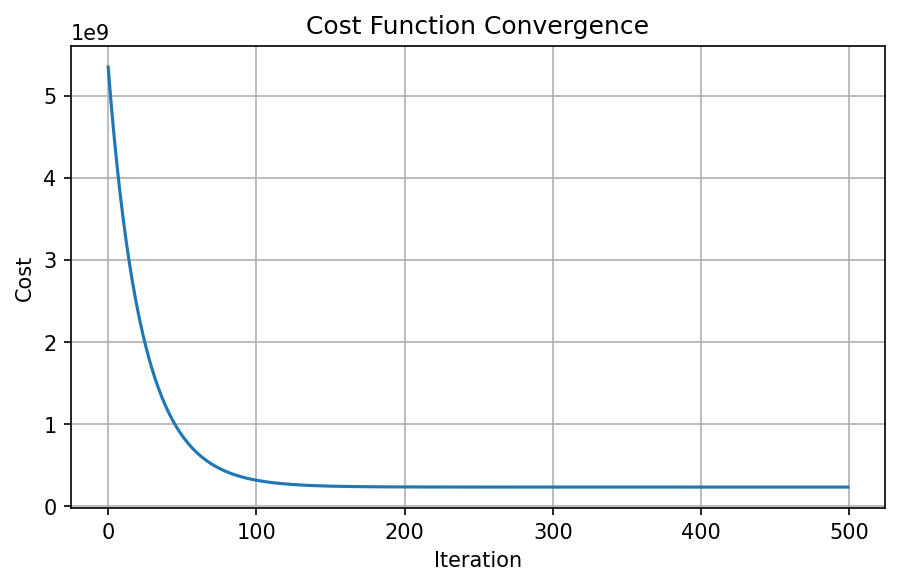

In [5]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt


class LinearRegressionIterative():
    
    def __init__(self, alpha=0.01, epochs=1000):
        """
        Abstract Base Class for Linear Regression models.
        """
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.cost_history = []
        print(f"Linear Regression Model Initialized with alpha={alpha}, epochs={epochs}")

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_predictions):
        """
        Compute cost using Mean Squared Error (MSE).
        Cost Function:
            The cost is calculated using the Mean Squared Error (MSE):
                Referred this from Lecture-8 Slide, otherplaces have 2m in the denominator, but my implementation is based on the lecture.
                It does not make any difference in the algorithms performance.
                J(w) = (1 / m) * Σ (y_predicted[i] - y_actual[i])^2, , for i = 1-m
            Where:
                - m: Number of samples
                - y_predicted[i]: Prediction for the i-th sample
                - y_actual[i]: Actual value for the i-th sample
        """
        m = len(y_actual)
        cost = 0.0
        for i in range(m):
            cost += (y_predictions[i] - y_actual[i])**2
        cost = cost / m
        return cost

    def update_weights(self, X, y_actual, y_predictions):
        """
        Gradient Calculation:
            The gradient of the cost with respect to the weights is:
                Referred this from Lecture-8 Slide, but poular notion dont have 2 in the dj/dw 
                because the cost function get adjusted by dividing it by 2
                
                ∂J/∂w[j] = (2 / m) * Σ (y_predicted[i] - y_actual[i]) * X[i, j], for i = 1-m
            Where:
                - w[j]: Weight for the j-th feature
                - X[i, j]: Value of the j-th feature for the i-th sample

            Weight Update Rule:
            Weights are updated using the gradient descent algorithm:
                w[j] = w[j] - α * ∂J/∂w[j]
            Where:
                - α: Learning rate
        """
        m, n = X.shape
        for i in range(m):
            error = y_predictions[i] - y_actual[i]
            for j in range(n):
                dw = 2 / m * (error * X[i, j]) 
                self.weights[j] -= self.alpha * dw 

    def fit(self, X, y):
        X = self.add_intercept(X)
        start = datetime.now()
        print(f"Start time for the gradient descent: {start}")
        m, n = X.shape
        self.weights = np.zeros(n)
        for epoch in range(self.epochs):
            predictions = np.dot(X, self.weights)
            self.update_weights(X, y, predictions)
            cost = self.compute_cost(y, predictions)
            self.cost_history.append(cost)
            if epoch <= 10 or epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f'\t Epoch {epoch + 1:4} / {self.epochs:4}, Cost: {cost:>15.4f}')
                
        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000} ")

    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.weights)

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=150)
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence')
        plt.grid(True)
        plt.show()


lr = LinearRegressionIterative(alpha=0.01, epochs=500)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()


## Observations -
- Linear Regression is running for 500 iterations.
- We can see that its converging  towards then end of the process. And Cost is not changing much in last 500 iterations.
- we are using alpha (learning_rate) = 0.01 which shows slower learning and smoother curve.
- As we are using iterative approach for the calculations, so its taking around 1900+ ms.

## 1-1-2 To simply the problem, please plot ‘price’ vs ‘lotsize’ as the below. The ‘price’ and ‘lotsize’ should be original scale instead of normalized scale.

### Note -  as the regression line plot is marked as bad example so I am omitting it. But I will have the code ready, if that is the requirement. Its not clear from the assignment if we have to plot it or not.BufferError


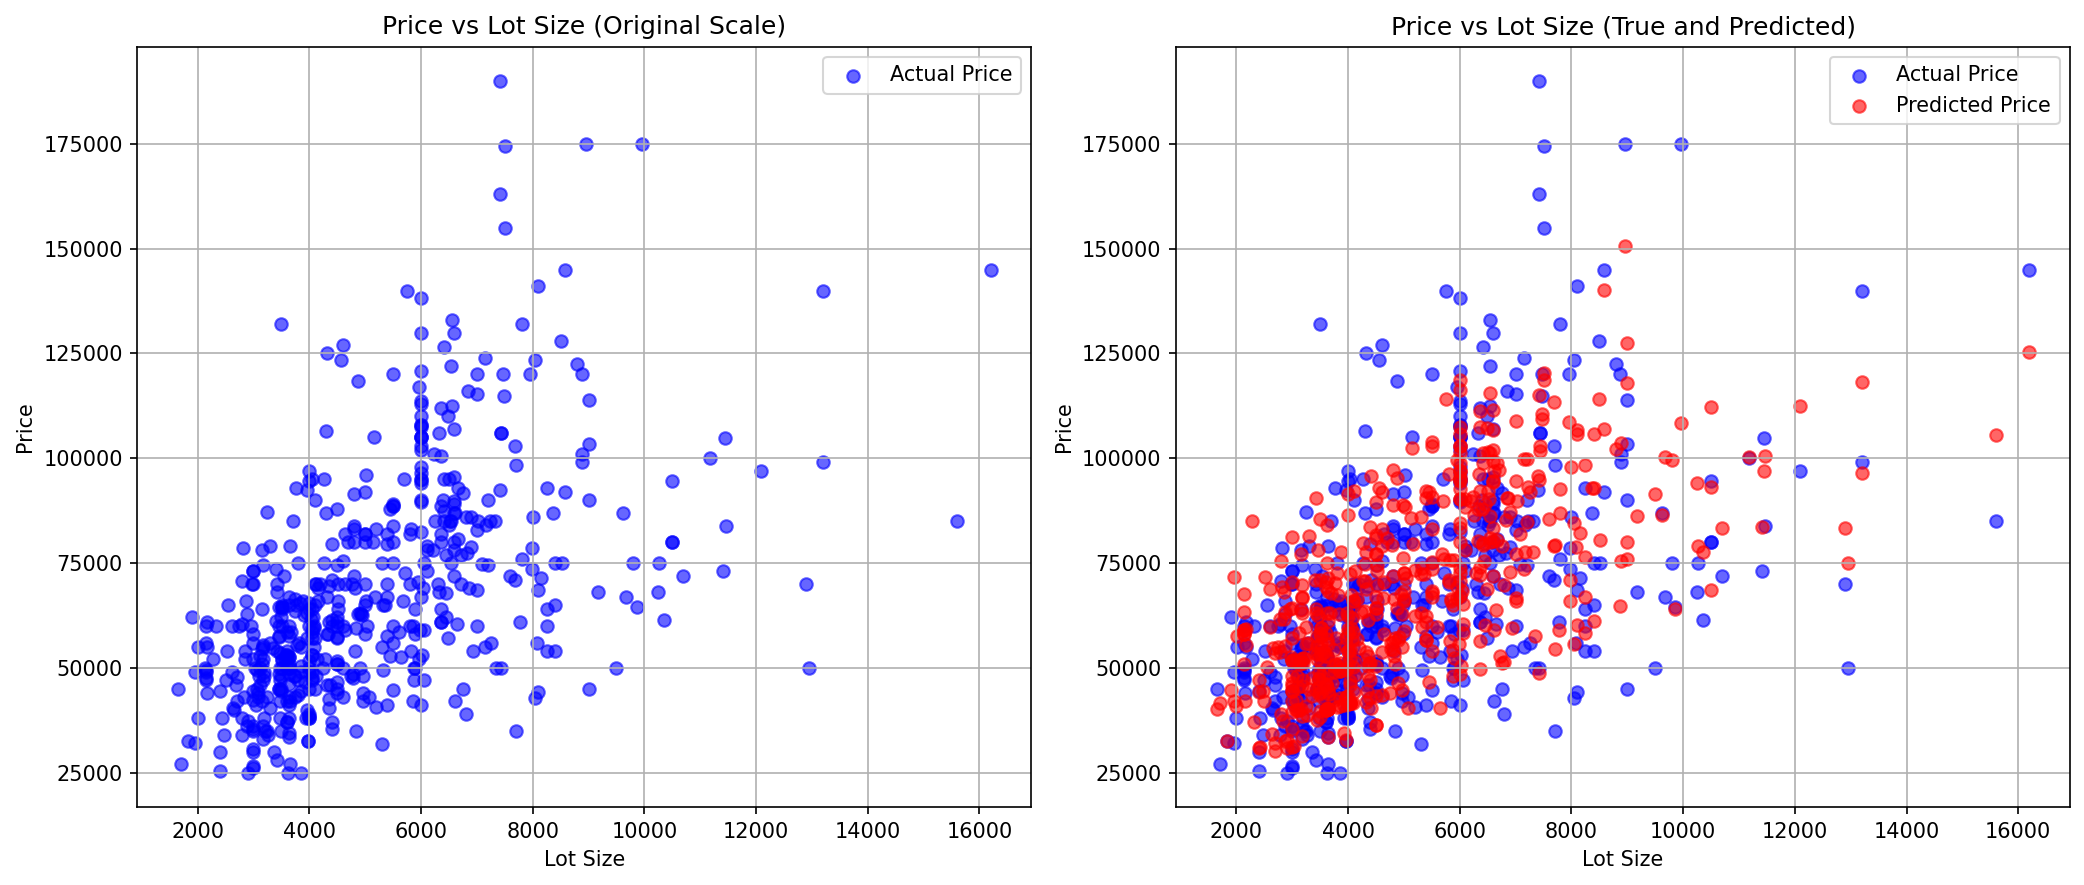

In [6]:

def scatter_plot_predictions(df, y_actual, y_prediction):
    # Extract original scale for lotsize
    lotsize = df['lotsize']

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=150)

    # Left plot: Price vs Lot size (original scale)
    axes[0].scatter(lotsize, y_actual, color='blue', label='Actual Price', alpha=0.6)
    axes[0].set_title('Price vs Lot Size (Original Scale)')
    axes[0].set_xlabel('Lot Size')
    axes[0].set_ylabel('Price')
    axes[0].grid(True)
    axes[0].legend()


    # Right plot: Price vs Lot size with Actual and Predicted Prices
    axes[1].scatter(lotsize, y_actual, color='blue', label='Actual Price', alpha=0.6)
    axes[1].scatter(lotsize, y_prediction, color='red', label='Predicted Price', alpha=0.6)
    axes[1].set_title('Price vs Lot Size (True and Predicted)')
    axes[1].set_xlabel('Lot Size')
    axes[1].set_ylabel('Price')
    axes[1].grid(True)
    axes[1].legend()

    # Show the plots
    plt.tight_layout()
    plt.show()


    """
    Note -  as the regression line plot is marked as bad example so I am omitting it. 
    But I will have the code ready, if that is the requirement. 
    Its not clear from the assignment if we have to plot it or not. 
    """
    # plt.scatter(lotsize, y_actual, color='blue', label='Price')
    # plt.plot(lotsize, y_prediction, color='red', label='Regression Line')
    # plt.xlabel('lotsize')
    # plt.ylabel('price')
    # plt.title('Linear Regression Plot')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

    
scatter_plot_predictions(df, y_home, y_pred)

## Observations
- The Linear Regression Model with Iterative Gradient Descent is implemented.
- The max predicted value is 150000 and the max actual value is 190000.
- The model is predicting the house prices lower than the actual prices.
- But we can see that its not predicting any extreme values which is not seen in the data.

## 1-1-3- Please plot ‘true-price’(y) vs ‘predicted-price’(y^̂) and display R2. Th ey and  y?̂ should be original scale instead of normalized scale.


R2 Score: 0.6731


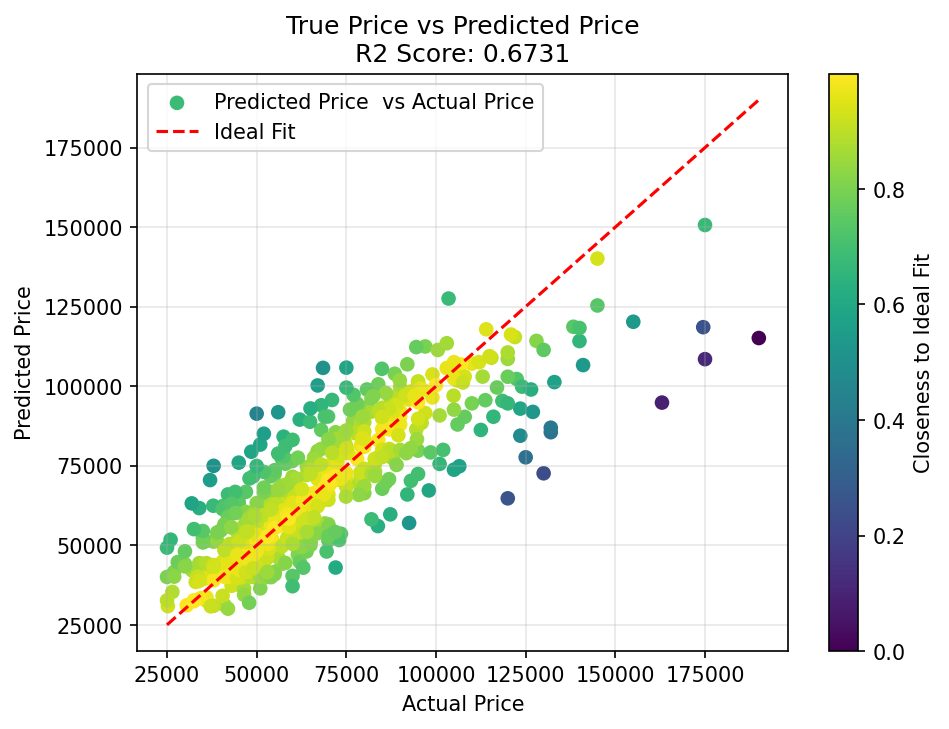

In [7]:
def r2_score(y_actual, y_predictions):
    """
    Computing the R2 score using the formula - 
        R² = 1 - (SS_res / SS_tot)
        where:
            SS_res = Σ(y_actual - y_predicted)²
            SS_tot = Σ(y_actual - mean(y_actual))²
    """
    ss_total = np.sum((y_actual - np.mean(y_actual))**2)
    ss_residual = np.sum((y_actual - y_predictions)**2)
    r2_score_value = 1 - (ss_residual / ss_total)
    print(f'R2 Score: {r2_score_value:.4f}')
    return r2_score_value


def r2_scatter_plot(y_actual, y_predictions, r2):
    differences = np.abs(y_actual - y_predictions)
    normalized_diff = 1 - (differences / differences.max()) 

    plt.figure(figsize=(7, 5), dpi=150)
    scatter = plt.scatter(
        y_actual, y_predictions, c=normalized_diff, label='Predicted Price  vs Actual Price'
    )
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.colorbar(scatter, label='Closeness to Ideal Fit')
    plt.title(f'True Price vs Predicted Price\nR2 Score: {r2:.4f}')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)


# Observations 

- The Linear Regression Model with Gradient Descent is implemented with two different cost functions.
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- R2 Score is calculated for the model and it is 0.6727 which is close to 1.
- The model is predicting the house prices lower than the actual prices.

## 1-2. (2pts) Please build a gradient descent algorithm based on the following cost function.

- Please print out the Root Mean Squared Error (RMSE) every iteration (until 10 epochs).
- Please fit the data using the Linear regression model with the optimum Weight.
- Please plot ‘true-price’(y) vs ‘predicted-price’(𝑦̂) and display R2.


Linear Regression with vector calculation Model Initialized with alpha=0.01, epochs=500
Start time for the gradient descent: 2024-11-19 22:53:13.810478
	 Epoch    1 /  500, Cost: 5352278701.3077
	 Epoch    2 /  500, Cost: 5126157738.2656
	 Epoch    3 /  500, Cost: 4911152726.2470
	 Epoch    4 /  500, Cost: 4706624985.9294
	 Epoch    5 /  500, Cost: 4511979327.3632
	 Epoch    6 /  500, Cost: 4326660660.0101
	 Epoch    7 /  500, Cost: 4150150889.8620
	 Epoch    8 /  500, Cost: 3981966078.2649
	 Epoch    9 /  500, Cost: 3821653839.3633
	 Epoch   10 /  500, Cost: 3668790955.1580
	 Epoch   11 /  500, Cost: 3522981189.0617
	 Epoch  101 /  500, Cost:  316131917.8791
	 Epoch  201 /  500, Cost:  234287445.6632
	 Epoch  301 /  500, Cost:  232701242.0317
	 Epoch  401 /  500, Cost:  232651962.9214
	 Epoch  500 /  500, Cost:  232647544.2478
End time for the gradient descent: 2024-11-19 22:53:13.863863, total time in ms : 53.385000000000005 


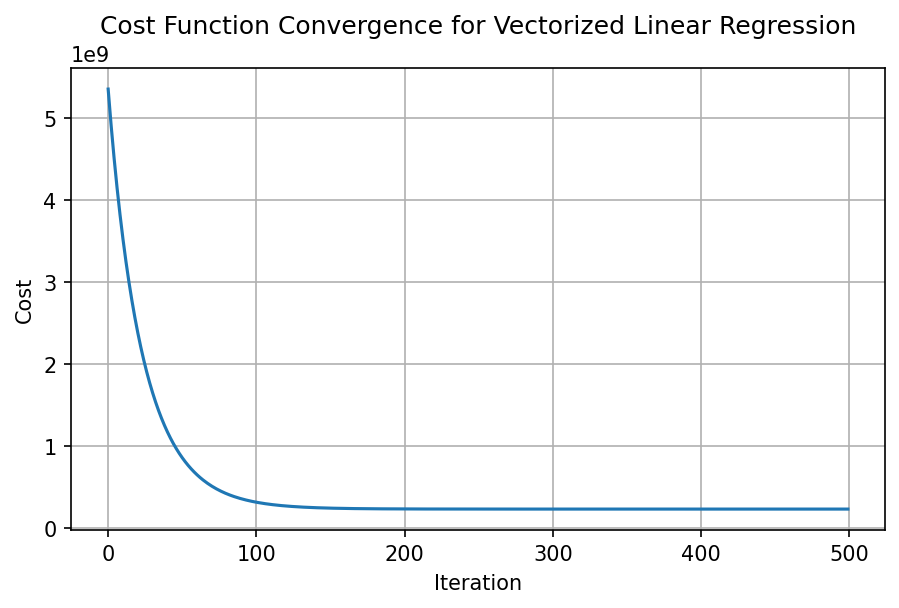

In [8]:

class LinearRegressionVectorized():
    
    def __init__(self, alpha=0.01, epochs=1000):
        """
        Class for Linear Regression model with Vector calculation.
        """
        self.alpha = alpha
        self.epochs = epochs
        self.weights = None
        self.cost_history = []
        print(f"Linear Regression with vector calculation Model Initialized with alpha={alpha}, epochs={epochs}")

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_predictions):
        """
        J(w) = (1 / m) * (errors.T * errors)
        Where:
        - errors = y_predictions - y_actual (Element-wise difference between predicted and actual values)

        """
        m = len(y_actual)
        errors = y_predictions - y_actual
        cost = (1 /  m) * np.dot(errors.T, errors) 
        return cost

    def update_weights(self, X, y_actual, y_predictions):
        """
        Weights are updated using the gradient descent algorithm:
            w = w - α * ∂J/∂w
        Where:
            - α: Learning rate
            - ∂J/∂w: Gradient of the cost with respect to the weights
        """
        m = len(y_actual)
        gradient = 2/m * np.dot(X.T, (y_predictions - y_actual)) 
        self.weights -= self.alpha * gradient

    def predict(self, X):
        X = self.add_intercept(X)
        return np.dot(X, self.weights)

    def fit(self, X, y):
        X = self.add_intercept(X)
        start = datetime.now()
        print(f"Start time for the gradient descent: {start}")
        m, n = X.shape
        self.weights = np.zeros(n)
        for epoch in range(self.epochs):
            predictions = np.dot(X, self.weights)
            self.update_weights(X, y, predictions)
            cost = self.compute_cost(y, predictions)
            self.cost_history.append(cost)
            if epoch <= 10 or epoch % 100 == 0 or epoch == self.epochs - 1:
                print(f'\t Epoch {epoch + 1:4} / {self.epochs:4}, Cost: {cost:>15.4f}')

        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000} ")

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=150)
        plt.plot(range(len(self.cost_history)), self.cost_history)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence for Vectorized Linear Regression')
        plt.grid(True)
        plt.show()




lr = LinearRegressionVectorized(alpha=0.01, epochs=500)
lr.fit(X_home, y_home)
y_pred = lr.predict(X_home)
lr.plot_cost()

##### Observations -
- Linear Regression is running for 500 iterations and the cost values are same as the Iterative approach.
- We can see that it's converging  towards then end of the process. And Cost is not changing much in last 500 iterations.
- we are using alpha (learning_rate) = 0.01 which shows slower learning and smoother curve.
- As we are using vector multiplication at each step the process is very fast taking 50 ms. which is more than 30 times faster than iterative approach.

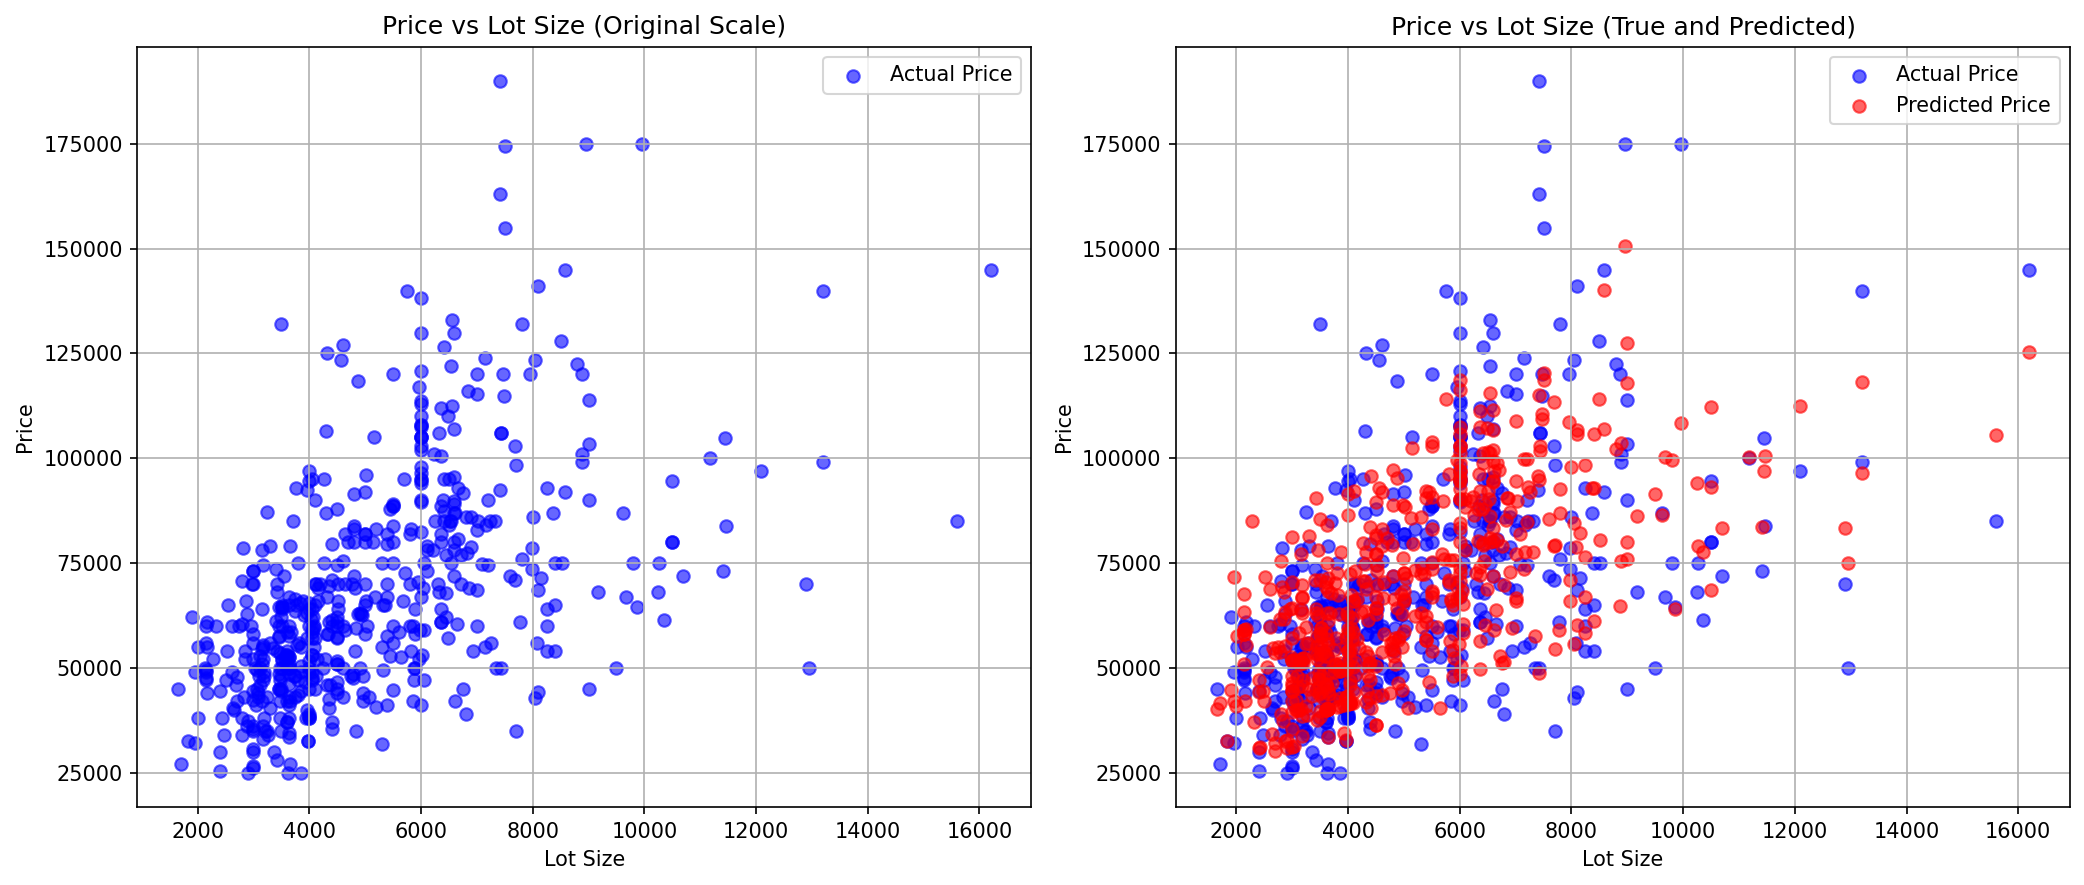

R2 Score: 0.6731


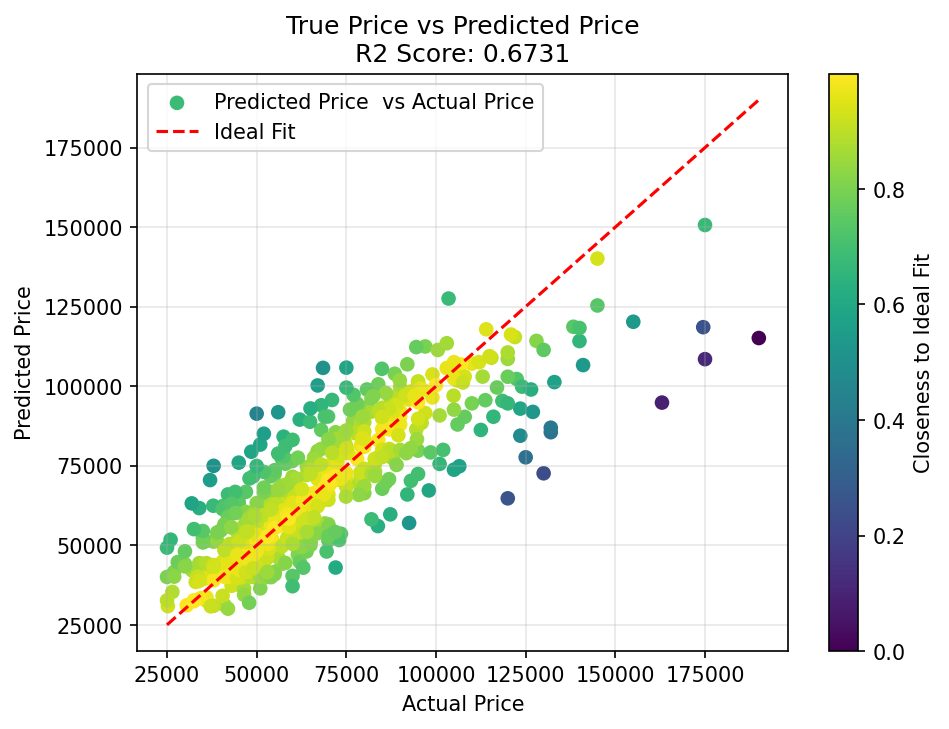

In [9]:
scatter_plot_predictions(df, y_home, y_pred)

r2 = r2_score(y_home, y_pred)
r2_scatter_plot(y_home, y_pred, r2)

# Observations for Question - 1

- The Linear Regression Model with Gradient Descent is implemented with two different implementation of cost functions and gradient
- The first cost function is a simple cost function that calculates the cost by iterating over each sample.
- The second cost function is a batch cost function that calculates the cost using vector operations.
- The vector cost function is more efficient and 30x faster than the iterative cost function.
- Both method gets the same result in terms of cost and predicted value, highlighting the importance of the vector implementation.


</br>
</br>
</br>

# 2. (5 pts) Binary classification with logistic regression

- ### Please download heart_disease_train.csv and heart_disease_test.csv. The dataset is for cardiovascular study. The target variable is ‘TenYearCHD’, which shows whether the patient has 10-year risk of future coronary heart disease (CHD). You can find a description of the variables in cardiovascular.txt.

- ### This is the task of Binary classification with logistic regression. You need to build a logistic regression model from scratch to predict ‘TenYearCHD’.

- ### Before applying gradient descent method, you might need to fill out missing value and normalize variables.

In [10]:
heart_train_df = pd.read_csv("data/heart_disease_train.csv")
heart_test_df = pd.read_csv("data/heart_disease_test.csv")
heart_train_df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [11]:
heart_train_df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
heart_train_df['TenYearCHD'].value_counts()

TenYearCHD
0    2874
1     516
Name: count, dtype: int64

### This shows that the data have class imbalance.

## Before applying gradient descent method, you might need to fill out missing value and normalize variables.

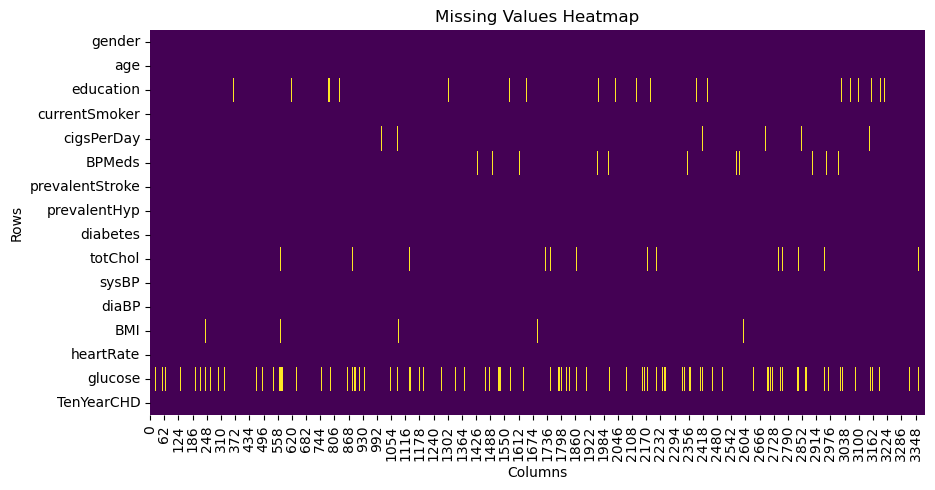

,column_name,column_dtype,distinct_values,missing_values,percent_missing,replacement_method
education,education,float64,4,84,2.477876,Mode
cigsPerDay,cigsPerDay,float64,32,25,0.737463,Mean/Median
BPMeds,BPMeds,float64,2,42,1.238938,Mode
totChol,totChol,float64,241,44,1.297935,Mean/Median
BMI,BMI,float64,1260,16,0.471976,Mean/Median
heartRate,heartRate,float64,71,1,0.029499,Mean/Median
glucose,glucose,float64,130,315,9.292035,Mean/Median


In [13]:
def find_missing_values(df):
    # Visualize missing values using a heatmap
    plt.figure(figsize=(10, 5), dpi=100)
    sns.heatmap(df.isnull().T, cbar=False, cmap="viridis")
    plt.title("Missing Values Heatmap")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

    # Calculate missing values and distinct counts
    missing_values = df.isnull().sum()
    distinct_counts = df.nunique()

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'column_name': df.columns,
        'column_dtype': df.dtypes,
        'distinct_values': distinct_counts,
        'missing_values': missing_values,
        'percent_missing': missing_values / len(df) * 100,
        'replacement_method': [
            'Mode' if df[col].dtype == 'object' or distinct_counts[col] < 10 else 'Mean/Median'
            if missing_values[col] > 0 else None
            for col in df.columns
        ]
    })
    return results_df

missing_analysis_df = find_missing_values(heart_train_df)
missing_analysis_df[missing_analysis_df['percent_missing'] > 0.0].head(200)

## Missing Value Handling Approach

- if the distinct values are less than or equal to 10, treating that column as categorical value and then use Mode to replace the missing value
- Other wise using the Mean and Median.
    - To check if a distribution is Normal or Not I am using Kurtosis, if that is < 3 then its normal distribution so use the mean value as replacement
    - Else using the Median value to replace the value
- In each of the above techniques using a subgroup of 6 columns - "gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes", which captures very distinct subset of people either with pre-existing condition or gender or behavior.
- Within that group I am using the above mentioned techniques for the missing value handling.

</br>

## Why This Subgroup
- I am using this as subgroup = "gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"
- Each of the columns have two values, so the resolution is not very large.
-  I am using 5 columns and each column with 2 possible values, so there are 32 different subgroups can be formed, and this is good subgroup as the training data have 3300+ values, so on average each subgroup will have 100 items.
- If we look closer this subgroup closely, we can see that this sub-group is combination of demographics,  their behavioural traits, and pre-exiting condition.

In [14]:
sub_groups = ["gender", "currentSmoker", "prevalentStroke", "prevalentHyp", "diabetes"]

In [15]:
from scipy.stats import kurtosis

class MissingValueImputer:

    def __init__(self, train_data, subgroup_cols=[]):
        """

        Taken this idea from Assignment-1 to use different methods for missing value handling.
        
        Initialize the imputer with training data and optional subgroup columns which will be used for the handling missing values.
        Parameters:
            - train_data: DataFrame to analyze for missing value replacement.
            - subgroup_cols: List of column names to use for subgroup-based replacement.
        """
        self.train_data = train_data
        self.subgroup_cols = subgroup_cols
        self.replacement_values = {}

    def decide_replacement_method(self, series):
        """
        Determine whether to use mean or median based on the distribution.
        If the kurtosis is high (indicating outliers), use the median; otherwise, use the mean.
        """
        if kurtosis(series.dropna()) > 3:
            return 'Median'
        return 'Mean'

    def fit(self):
        """
        Calculate replacement values for each column in the training data.
        Stores the replacement values for each subgroup (if specified) or globally otherwise.
        """
        columns_with_missing = self.train_data.isnull().sum()
        columns_with_missing = columns_with_missing[columns_with_missing > 0].index

        for col in columns_with_missing:
            if self.subgroup_cols:
                # Subgroup-based replacement using multiple subgroup columns
                replacement_method = {}
                for subgroup, group_data in self.train_data.groupby(self.subgroup_cols):
                    if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                        replacement_value = group_data[col].mode().iloc[0] if not group_data[col].mode().empty else np.nan
                    else:
                        method = self.decide_replacement_method(group_data[col])
                        replacement_value = group_data[col].median() if method == 'Median' else group_data[col].mean()
                    replacement_method[subgroup] = replacement_value
                self.replacement_values[col] = replacement_method
            else:
                # Global replacement
                if self.train_data[col].dtype == 'object' or self.train_data[col].nunique() < 10:
                    self.replacement_values[col] = self.train_data[col].mode().iloc[0] if not self.train_data[col].mode().empty else np.nan
                else:
                    method = self.decide_replacement_method(self.train_data[col])
                    self.replacement_values[col] = self.train_data[col].median() if method == 'Median' else self.train_data[col].mean()


    def replace(self, data):
        for col, replacement in self.replacement_values.items():
            if isinstance(replacement, dict):  # Subgroup-based replacement
                data[col] = data.groupby(self.subgroup_cols)[col].apply(
                    lambda group: group.fillna(replacement.get(tuple(group.name), np.nan))
                ).reset_index(level=self.subgroup_cols, drop=True)
            else:
                # Global replacement
                data[col] = data[col].fillna(replacement)
        return data


imputer = MissingValueImputer(heart_train_df, subgroup_cols=sub_groups)
imputer.fit()

heart_train_imputed_df = imputer.replace(heart_train_df.copy())
heart_test_imputed_df = imputer.replace(heart_test_df.copy())

print(f"Train : Null values after imputations = {heart_train_imputed_df.isnull().sum().sum()}")
print(f"Test : Null values after imputations = {heart_test_imputed_df.isnull().sum().sum()}")



Train : Null values after imputations = 0
Test : Null values after imputations = 0


In [16]:
heart_train_imputed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,3390.0,0.433628,0.495648,0.00,0.00,0.000,1.000,1.0
age,3390.0,49.614159,8.609617,32.00,42.00,49.000,57.000,70.0
education,3390.0,1.961652,1.019580,1.00,1.00,2.000,3.000,4.0
currentSmoker,3390.0,0.486726,0.499897,0.00,0.00,0.000,1.000,1.0
cigsPerDay,3390.0,9.032161,12.018124,0.00,0.00,0.000,20.000,70.0
BPMeds,3390.0,0.028024,0.165065,0.00,0.00,0.000,0.000,1.0
prevalentStroke,3390.0,0.004720,0.068548,0.00,0.00,0.000,0.000,1.0
prevalentHyp,3390.0,0.302065,0.459221,0.00,0.00,0.000,1.000,1.0
diabetes,3390.0,0.024779,0.155473,0.00,0.00,0.000,0.000,1.0
totChol,3390.0,236.763368,45.068948,107.00,206.00,233.500,263.000,696.0


### -  Normalize Data

- I am using the normalization using mean and standard deviation values.
- using the same mean and std for the test data.
- as we can see in the describe method output all the values for count are same.

In [17]:
X_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[:-1]]
y_heart_train = heart_train_imputed_df[heart_train_imputed_df.columns[-1]]
X_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[:-1]]
y_heart_test = heart_test_imputed_df[heart_test_imputed_df.columns[-1]]


X_heart_mean = X_heart_train.mean()
X_heart_std = X_heart_train.std()

X_heart_train = (X_heart_train - X_heart_mean) / X_heart_std
X_heart_test = (X_heart_test - X_heart_mean) / X_heart_std

print(f"{X_heart_train.shape = }, {y_heart_train.shape = }")
print(f"{X_heart_test.shape = }, {y_heart_test.shape = }")


X_heart_train.shape = (3390, 15), y_heart_train.shape = (3390,)
X_heart_test.shape = (848, 15), y_heart_test.shape = (848,)


## 2-3 Please build a gradient descent algorithm based on the following formulas. Instead, you may build an algorithm based on the matrix formula.

## Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset

Starting the gradient descent algo at 2024-11-19 22:53:14.959233
Epoch    1 / 2000, Cost: 0.6931
Epoch    2 / 2000, Cost: 0.6902
Epoch    3 / 2000, Cost: 0.6873
Epoch    4 / 2000, Cost: 0.6845
Epoch    5 / 2000, Cost: 0.6817
Epoch    6 / 2000, Cost: 0.6789
Epoch    7 / 2000, Cost: 0.6762
Epoch    8 / 2000, Cost: 0.6735
Epoch    9 / 2000, Cost: 0.6708
Epoch   10 / 2000, Cost: 0.6682
Epoch  201 / 2000, Cost: 0.4526
Epoch  401 / 2000, Cost: 0.4065
Epoch  601 / 2000, Cost: 0.3925
Epoch  801 / 2000, Cost: 0.3872
Epoch 1001 / 2000, Cost: 0.3847
Epoch 1201 / 2000, Cost: 0.3836
Epoch 1401 / 2000, Cost: 0.3829
Epoch 1601 / 2000, Cost: 0.3826
Epoch 1801 / 2000, Cost: 0.3824
Epoch 2000 / 2000, Cost: 0.3823
End time for the gradient descent: 2024-11-19 22:56:22.957866, total time in ms : 187998.633 


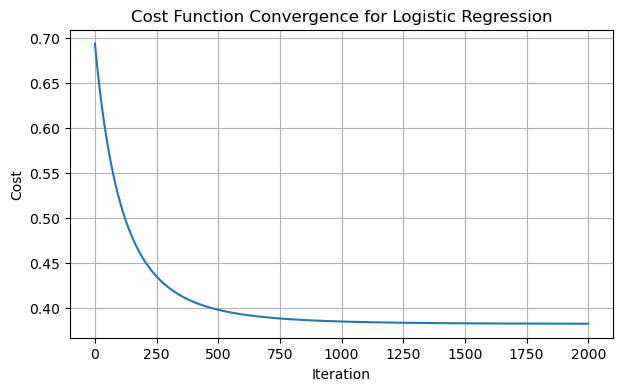

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegressionIterative:

    def __init__(self, learning_rate=0.01, num_iterations=1000, func='sigmoid'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.func = func
        self.weights = None
        self.costs = []

    def logistic_function(self, z):
        if self.func == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.func == 'bipolar_sigmoid':
            return (2 / (1 + np.exp(-z))) - 1
        elif self.func == 'tanh_scaled':
            return 0.5 * (np.tanh(z) + 1)
        else:
            raise ValueError(f"Unsupported logistic function: {self.func}")

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_pred):
        """
        Compute the cost function for logistic regression.
        J = - (1/m) * Σ [y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i)]
        """
        num_samples = len(y_actual)
        cost = 0.0
        for i in range(num_samples):
            cost += y_actual[i] * np.log(y_pred[i]) + (1 - y_actual[i]) * np.log(1 - y_pred[i])
        cost = -cost / num_samples
        return cost

    def update_weights(self, y_actual, y_pred, X):
        """
        Update weights using gradient descent.
        ∂J/∂w_j = (1/m) * Σ (y_predicted_i - y_actual_i) * x_ij
        W_j(t) = W_j(t-1) - α * (∂J/∂W_j)
        """
        num_samples, num_features = X.shape
        for j in range(num_features):
            gradient = 0.0
            for i in range(num_samples):
                gradient += (y_pred[i] - y_actual[i]) * X[i][j]
            gradient /= num_samples
            self.weights[j] -= self.learning_rate * gradient

    def _predict_scores(self, X):
        num_samples = X.shape[0]
        linear_model = np.zeros(num_samples)
        for i in range(num_samples):
            linear_model[i] = np.dot(X[i], self.weights)
        return self.logistic_function(linear_model)

    def predict_scores(self, X):
        X = self.add_intercept(X)
        return self._predict_scores(X)

    def predict(self, X):
        predictions = self.predict_scores(X)
        return (predictions > 0.5).astype(int)

    def fit(self, X, y):
        X = self.add_intercept(X)
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)

        start = datetime.now()
        print(f"Starting the gradient descent algo at {start}")
        for i in range(self.num_iterations):
            predictions = self._predict_scores(X)
            self.update_weights(y, predictions, X)
            cost = self.compute_cost(y, predictions)
            self.costs.append(cost)
            if i < 10 or i % (self.num_iterations // 10) == 0 or i == self.num_iterations - 1:
                print(f'Epoch {i + 1:4} / {self.num_iterations:4}, Cost: {cost:>2.4f}')
        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000} ")

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence for Logistic Regression')
        plt.grid(True)
        plt.show()



logistic_regression2 = LogisticRegressionIterative(learning_rate=0.02, num_iterations=2000)
logistic_regression2.fit(X_heart_train, y_heart_train)
logistic_regression2.plot_cost()

Starting the gradient descent algo at 2024-11-19 22:56:36.769991
	 Epoch    1 / 2000, Cost: 0.6931
	 Epoch    2 / 2000, Cost: 0.6902
	 Epoch    3 / 2000, Cost: 0.6873
	 Epoch    4 / 2000, Cost: 0.6845
	 Epoch    5 / 2000, Cost: 0.6817
	 Epoch    6 / 2000, Cost: 0.6789
	 Epoch    7 / 2000, Cost: 0.6762
	 Epoch    8 / 2000, Cost: 0.6735
	 Epoch    9 / 2000, Cost: 0.6708
	 Epoch   10 / 2000, Cost: 0.6682
	 Epoch  201 / 2000, Cost: 0.4526
	 Epoch  401 / 2000, Cost: 0.4065
	 Epoch  601 / 2000, Cost: 0.3925
	 Epoch  801 / 2000, Cost: 0.3872
	 Epoch 1001 / 2000, Cost: 0.3847
	 Epoch 1201 / 2000, Cost: 0.3836
	 Epoch 1401 / 2000, Cost: 0.3829
	 Epoch 1601 / 2000, Cost: 0.3826
	 Epoch 1801 / 2000, Cost: 0.3824
	 Epoch 2000 / 2000, Cost: 0.3823
End time for the gradient descent: 2024-11-19 22:56:37.927546, total time in ms : 1157.5549999999998 


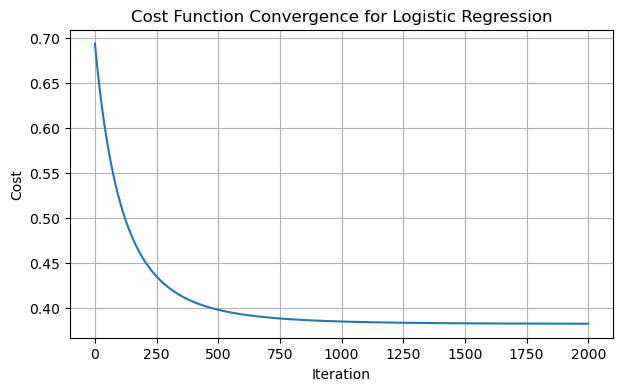

In [23]:
class LogisticRegressionVectorized:

    def __init__(self, learning_rate=0.01, num_iterations=1000, func='sigmoid'):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.func = func
        self.weights = None
        self.costs = []

    def logistic_function(self, z):
        if self.func == 'sigmoid':
            return 1 / (1 + np.exp(-z))
        elif self.func == 'bipolar_sigmoid':
            return (2 / (1 + np.exp(-z))) - 1
        elif self.func == 'tanh_scaled':
            return 0.5 * (np.tanh(z) + 1)
        else:
            raise ValueError(f"Unsupported logistic function: {self.func}")

    def add_intercept(self, X):
        return np.c_[np.ones(X.shape[0]), X]

    def compute_cost(self, y_actual, y_pred):
        """
        The cost function is defined as:
            J = - (1/m) * Σ [y_i * log(ŷ_i) + (1 - y_i) * log(1 - ŷ_i)]
        Where:
            - m: Number of samples
            - y_i: Actual label for the i-th sample (0 or 1)
            - ŷ_i: Predicted probability for the i-th sample
        """
        num_samples = len(y_actual)
        cost = - (1 / num_samples) * np.sum(y_actual * np.log(y_pred) + (1 - y_actual) * np.log(1 - y_pred))
        return cost

    def update_weights(self, y_actual, y_pred, X):
        """
        The weight update rule is defined as:
            ∂J/∂w_j = (1/m) * Σ (y_predicted_i - y_actual_i) * x_ij
            W_j(t) = W_j(t-1) - α * (∂J/∂W_j)    
        Where:
            - W_j(t): Weight for the j-th feature at iteration t
            - W_j(t-1): Weight for the j-th feature at iteration t-1
            - α: Learning rate
            - ∂J/∂W_j: Partial derivative of the cost function with respect to the j-th weight
        """
        num_samples = len(y_actual)
        error = y_pred - y_actual
        dw = (1 / num_samples) * np.dot(X.T, error)
        self.weights -= self.learning_rate * dw

    def _predict_scores(self, X):
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict_scores(self, X):
        X = self.add_intercept(X)
        linear_model = np.dot(X, self.weights)
        return self.logistic_function(linear_model)

    def predict(self, X):
        predictions = self.predict_scores(X)
        return (predictions > 0.5).astype(int)

    def fit(self, X, y):
        X = self.add_intercept(X)
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        
        start = datetime.now()
        print(f"Starting the gradient descent algo at {start}")
        for i in range(self.num_iterations):
            predictions = self._predict_scores(X)
            self.update_weights(y, predictions, X)
            cost = self.compute_cost(y, predictions)
            self.costs.append(cost)
            if i < 10 or i % (self.num_iterations/10) == 0 or i == self.num_iterations - 1:
                print(f'\t Epoch {i + 1:4} / {self.num_iterations:4}, Cost: {cost:>2.4f}')
        end = datetime.now()
        print(f"End time for the gradient descent: {end}, total time in ms : {(end - start).total_seconds() * 1000} ")

    def plot_cost(self):
        plt.figure(figsize=(7, 4), dpi=100)
        plt.plot(range(len(self.costs)), self.costs)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function Convergence for Logistic Regression')
        plt.grid(True)
        plt.show()


logistic_regression = LogisticRegressionVectorized(learning_rate=0.02, num_iterations=2000)
logistic_regression.fit(X_heart_train, y_heart_train)
logistic_regression.plot_cost()


## Observations -
- As we can see that Vectorized is very fast in comparision of the Iterative approach. As the number of examples will increase the iterative approach will get slower.

## Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration.

In [20]:
def compute_metrics(y_true, y_pred, y_scores=None, plot_confusion_matrix=True, message=""):
    """
    Compute evaluation metrics (TP, FP, TN, FN, Precision, Recall, F1, Accuracy, ROC AUC)
    and optionally plot the confusion matrix.
    """
    
    # Confusion Matrix Components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Precision, Recall, F1 Score
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)


    metrics = {
        'True Positive (TP)': TP,
        'True Negative (TN)': TN,
        'False Positive (FP)': FP,
        'False Negative (FN)': FN,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score,
        'Accuracy': accuracy,
    }

    print(f"Metrics on the {message} data.")
    for key, value in metrics.items():
        print(f"\t {key}: {value:.4f}")

    if plot_confusion_matrix:
        plt.figure(figsize=(6, 4), dpi=150)
        cm = np.array([[TN, FP], [FN, TP]])
        plt.imshow(cm, cmap='Blues', alpha=0.7)
        plt.title(f"Confusion Matrix on {message} data", fontsize=16)
        plt.xticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.yticks([0, 1], ['Negative', 'Positive'], fontsize=12)
        plt.xlabel("Predicted Label", fontsize=14)
        plt.ylabel("True Label", fontsize=14)
        plt.grid(False)
        for i in range(2):
            for j in range(2):
                plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='black')

        plt.colorbar()
        plt.show()

    return metrics


Metrics on the Train data.
	 True Positive (TP): 35.0000
	 True Negative (TN): 2861.0000
	 False Positive (FP): 13.0000
	 False Negative (FN): 481.0000
	 Precision: 0.7292
	 Recall: 0.0678
	 F1 Score: 0.1241
	 Accuracy: 0.8543


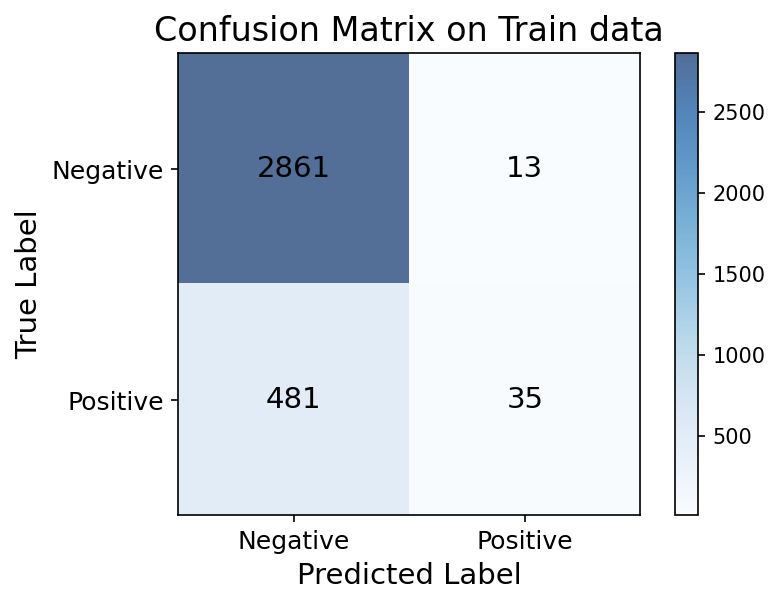

In [21]:
y_train_pred_probabilities = logistic_regression.predict_scores(X_heart_train)
y_train_pred = logistic_regression.predict(X_heart_train)

train_metrics = compute_metrics(y_heart_train, y_train_pred, y_train_pred_probabilities, message="Train")


Metrics on the Test data.
	 True Positive (TP): 9.0000
	 True Negative (TN): 716.0000
	 False Positive (FP): 4.0000
	 False Negative (FN): 119.0000
	 Precision: 0.6923
	 Recall: 0.0703
	 F1 Score: 0.1277
	 Accuracy: 0.8550


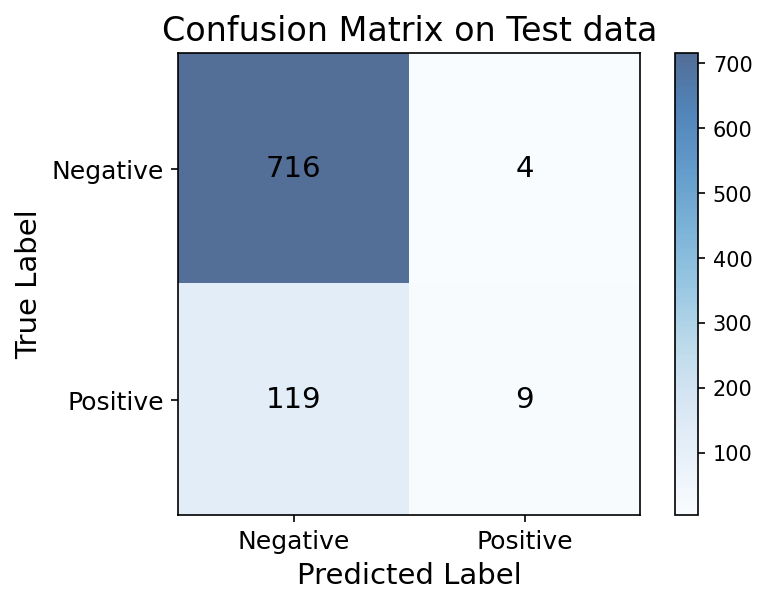

In [22]:
y_test_pred_probabilities = logistic_regression.predict_scores(X_heart_test)
y_test_pred = logistic_regression.predict(X_heart_test)

test_metrics = compute_metrics(y_heart_test, y_test_pred, y_test_pred_probabilities, message="Test")


## Observations -
- The logistic regression algorithm with gradient descent algorithm.
- The model maintains high precision on both training (72.92%) and test (69.23%) datasets, indicating that when it predicts a positive class, it is often correct.
- The recall is notably low on both training (6.78%) and test (7.03%) datasets, suggesting that the model misses a significant number of actual positive cases.
- The low F1 scores (12.41% on training and 12.77% on test) reflect the imbalance between precision and recall, highlighting the model's difficulty in capturing positive instances effectively.
- The accuracy is similar on both datasets (approximately 85.43% on training and 85.50% on test). However, in cases of class imbalance, accuracy can be misleading.


The model demonstrates high precision but suffers from low recall, leading to low F1 scores. This pattern suggests that while the model is good at correctly identifying negative instances, it struggles to detect positive cases, likely due to class imbalance. 

To further improve performance, we should consider techniques such as adjusting class weights, oversampling the minority class, or employing more sophisticated algorithms.